In [4]:
import pandas as pd 
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams['font.family'] = 'sans-serif'

In [7]:
df_part_0 = pd.read_csv('../results/learningcurve/learningurve_run_2020_06_08_23_36_1591652177.csv')
df_part_1 = pd.read_csv('../results/learningcurve/learningurve_run_2020_06_09_07_44_1591681458.csv')

In [8]:
df_lc = pd.concat([df_part_0, df_part_1])

In [11]:
df_lc.groupby('ts_size').agg(['mean', 'std'])

Unnamed: 0                 r2                 mae                 mse  \
              mean      std      mean       std      mean       std      mean   
ts_size                                                                         
10             4.5  3.02765  0.058429  0.213351  0.249736  0.025378  0.132731   
100           14.5  3.02765  0.167469  0.206007  0.239433  0.023933  0.118264   
200           24.5  3.02765  0.084171  0.211030  0.249407  0.022542  0.129216   
500           34.5  3.02765 -0.004995  0.197393  0.259876  0.021792  0.141569   
1000          44.5  3.02765  0.046798  0.215845  0.252637  0.025279  0.134373   
2000          54.5  3.02765  0.054895  0.221633  0.251009  0.025252  0.133178   
5000          64.5  3.02765 -0.038481  0.180938  0.262321  0.020794  0.145668   
5600           4.5  3.02765  0.089512  0.206863  0.249565  0.022058  0.128358   

                       mdae           median_delta_e           mean_delta_e  \
              std      mean       std           mean       std         mean   
ts_size                                                                       
10       0.028717  0.140577  0.011132      25.210333  2.398293    33.802727   
100      0.027745  0.149037  0.011022      24.363497  2.329523    30.492327   
200      0.028262  0.147269  0.013419      24.993468  2.183766    32.823257   
500      0.026782  0.145828  0.008113      26.159967  2.414129    35.206747   
1000     0.029096  0.143317  0.010196      25.527194  2.843911    33.965194   
2000     0.029773  0.140879  0.008198      25.366680  2.328140    33.898943   
5000     0.024411  0.141342  0.009216      26.511182  1.982910    36.463957   
5600     0.027786  0.150143  0.011990      25.628977  2.256321    33.147007   

                  iteration           
              std      mean      std  
ts_size                               
10       6.036851       4.5  3.02765  
100      5.559037       4.5  3.02765  
200      5.734884       4.5  3.02765  
500      5.668817       4.5  3.02765  
1000     6.303790       4.5  3.02765  
2000     6.148066       4.5  3.02765  
5000     5.057014       4.5  3.02765  
5600     5.842234       4.5  3.02765

/Users/kevinmaikjablonka/opt/miniconda3/envs/colorml2/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  """
/Users/kevinmaikjablonka/opt/miniconda3/envs/colorml2/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  


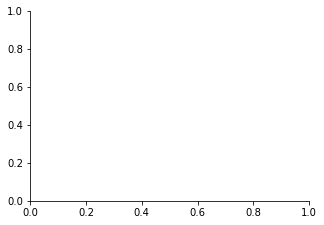

In [6]:
fig, ax = plt.subplots(figsize=(5,3.5))

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)

fig.tight_layout()